# **11. 앙상블 - Bagging**

## 1.데이터 준비

#### 01.라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### 02.데이터 업로드

In [ ]:
# mobile data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv"
data = pd.read_csv(path)
data.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
data.rename(columns = {'HANDSET_PRICE':'H_PRICE',
                       'AVERAGE_CALL_DURATION':'DURATION',
                       'REPORTED_SATISFACTION':'SATISFACTION',
                       'CONSIDERING_CHANGE_OF_PLAN':'CHANGE'}
            , inplace = True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,H_PRICE,DURATION,SATISFACTION,CHANGE,CHURN
0,0,31953,0,6,313378,161,4,unsat,no,STAY
1,1,36147,0,13,800586,244,6,unsat,considering,STAY
2,1,27273,230,0,305049,201,15,unsat,perhaps,STAY
3,0,120070,38,33,788235,780,2,unsat,considering,LEAVE
4,1,29215,208,85,224784,241,1,very_unsat,never_thought,STAY


|변수 명|내용|구분|
|----|----|----|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


In [ ]:
# 데이터분할1
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
dumm_cols = ['SATISFACTION','CHANGE']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

# 데이터 분할2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.5)

## 2.모델링


In [ ]:
# 1) 함수 불러오기
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [ ]:
# 2) 모델 선언
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [ ]:
# 3) 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [ ]:
# 4) 예측
pred = model.predict(x_val)

In [ ]:
# 5) 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.71      0.60      0.65      4895
        STAY       0.67      0.76      0.71      5105

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



## 3.Random Forest에 대해서...

### (1) 모델의 내부를 살펴봅시다.

In [ ]:
# 5개 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=105632344),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1195803792),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1647328984),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2077159052),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1081783815)]

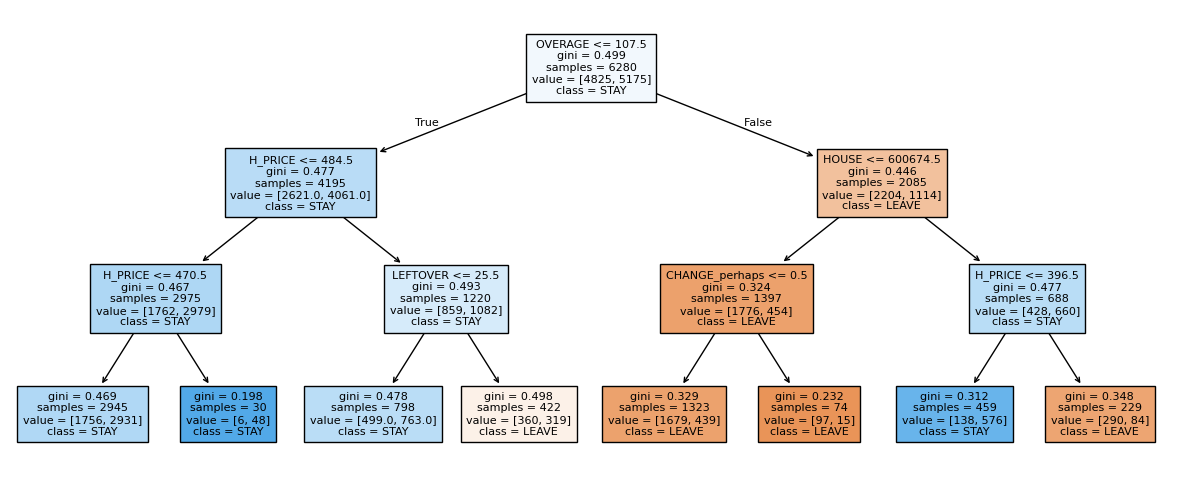

In [ ]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(15,6))
plot_tree(model.estimators_[0],
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'],
               filled = True, fontsize = 8);

### (2) 변수 중요도

In [ ]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'H_PRICE',
       'DURATION', 'SATISFACTION_sat', 'SATISFACTION_unsat',
       'SATISFACTION_very_sat', 'SATISFACTION_very_unsat',
       'CHANGE_considering', 'CHANGE_never_thought', 'CHANGE_no',
       'CHANGE_perhaps'],
      dtype='object')
[0.00000000e+00 1.01953862e-01 3.52434209e-01 6.10420114e-02
 3.42160048e-01 1.17418080e-01 2.08250095e-02 0.00000000e+00
 2.80400356e-03 0.00000000e+00 5.17435680e-04 0.00000000e+00
 5.48254607e-04 0.00000000e+00 2.97085725e-04]


* 변수중요도 그래프 그리기 함수 만들기

In [ ]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

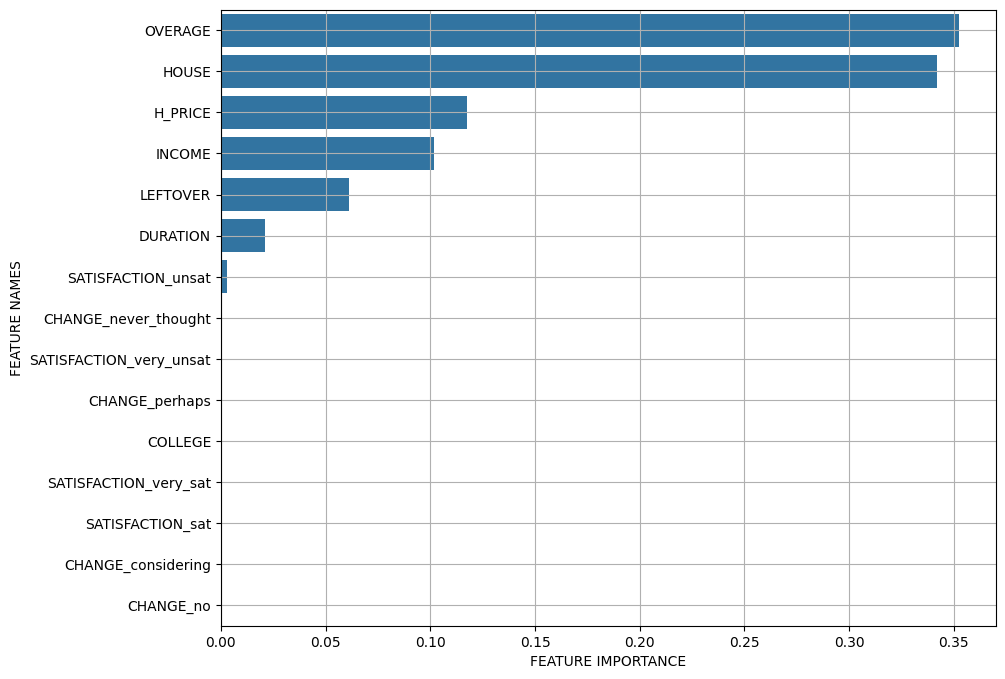

In [ ]:
plot_feature_importance(model.feature_importances_, x_train.columns)

* 랜덤포레스트의 변수 중요도
    * 개별 트리의 변수 중요도의 평균

## 4.random forest 튜닝
* grid search를 수행해 보겠습니다.
    * tree의 갯수 : 10~100까지 5개씩 증가
    * max_depth : [3,5,7,9]
    * cv = 5
    * 모델링 후 cv 평가 결과를 차트로 그려보겠습니다.

In [ ]:
# 하이퍼파라미터 실정
params = {'n_estimators': range(5,101,5), 'max_depth':[3,5,7,9]}

In [ ]:
# 함수 불러오기
from sklearn.model_selection import GridSearchCV

In [ ]:
# 모델 선언 및 학습
model_gs = GridSearchCV(RandomForestClassifier(), params, cv = 5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': range(5, 101, 5)})

In [ ]:
# 튜닝 결과 확인
model_gs.best_params_, model_gs.best_score_

({'max_depth': 7, 'n_estimators': 80}, np.float64(0.7036))

In [ ]:
# 튜닝된 모델로 예측하고 평가하기
pred = model_gs.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.69      0.68      0.69      4895
        STAY       0.70      0.71      0.71      5105

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
# 튜닝 결과 확인2 : 그래프로 확인하기
result = pd.DataFrame(model_gs.cv_results_)
result = result[['param_max_depth','param_n_estimators', 'mean_test_score']]

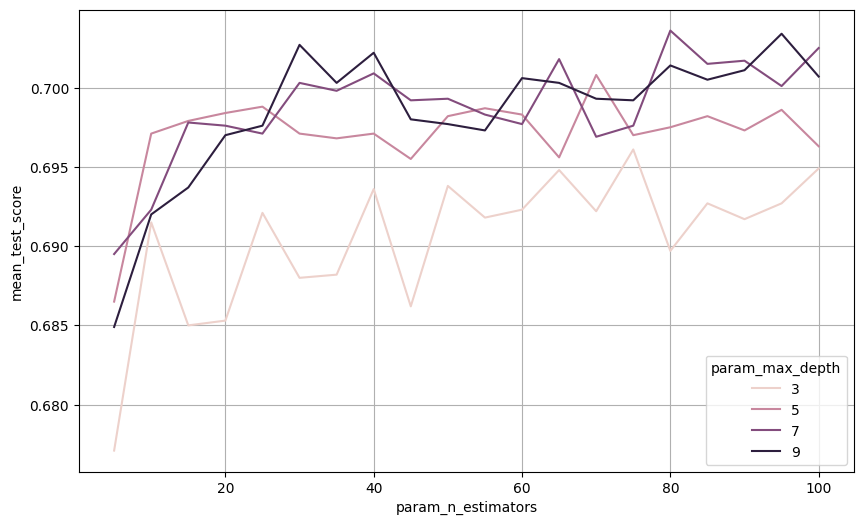

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = result
             , hue = 'param_max_depth' )
plt.grid()
plt.show()

In [ ]:
model_gs.best_estimator_.feature_importances_

array([0.00585334, 0.14240812, 0.28159579, 0.0839522 , 0.33227042,
       0.07556943, 0.04789125, 0.0035364 , 0.00517497, 0.00406873,
       0.00331189, 0.00389334, 0.00391154, 0.00375252, 0.00281007])

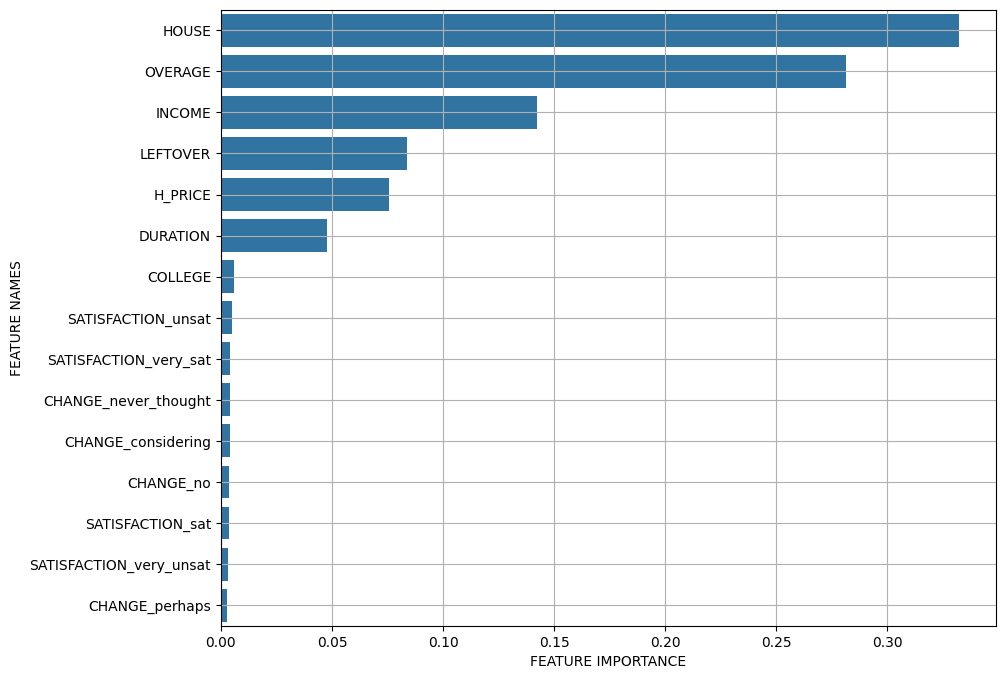

In [ ]:
# 변수 중요도
## grid search를 하니까 변수 중요도가 달라짐
plot_feature_importance(model_gs.best_estimator_.feature_importances_, x_train.columns)

## 5.복습문제
* 카시트 데이터를 이용하여 랜덤포레스트 모델을 생성해 봅시다.
    * 카시트 판매량 예측 : 회귀
    * 기본 전처리
    * 알고리즘 : **RandomForestRegressor**  (회귀 모델)
    * 모델 튜닝 : Grid Search

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### (1) data loading

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'

data = pd.read_csv(path)  # csv 파일을 불러올때, 지정한 칼럼의 데이터만 가져오기
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


### (2) 데이터분할1 : x, y 나누기

In [ ]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) 가변수화

In [ ]:
cat_cols = ['ShelveLoc', 'US','Urban']

In [ ]:
# 첫번째 가변수 제거
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,138,73,11,276,120,42,17,False,False,True,True
1,111,48,16,260,83,65,10,True,False,True,True
2,113,35,10,269,80,59,12,False,True,True,True
3,117,100,4,466,97,55,14,False,True,True,True
4,141,64,3,340,128,38,13,False,False,False,True


### (4) 데이터분할2 : train : validation 나누기

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (5) 랜덤포레스트 모델링 : 튜닝
* 성능 튜닝을 수행해 봅시다.
* 하이퍼파라미터 범위
    * n_estimators : 10 ~ 200
    * max_depth : 2 ~ 10


In [ ]:
params = {'n_estimators': range(10,201), 'max_depth': range(2,11)}

In [ ]:
model_gs = GridSearchCV(RandomForestRegressor(), params, cv = 5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 11),
                         'n_estimators': range(10, 201)})

In [ ]:
model_gs.best_params_, model_gs.best_score_

({'max_depth': 9, 'n_estimators': 17}, np.float64(0.6956937673614325))

In [ ]:
pred = model_gs.predict(x_val)
print("MSE: ", mean_squared_error( y_val, pred))
print("RMSE: ", root_mean_squared_error( y_val, pred))
print("MAE: ", mean_absolute_error(y_val, pred))

MSE:  3.3844538439449443
RMSE:  1.839688518185876
MAE:  1.4662072192397337


In [ ]:
result = pd.DataFrame(model_gs.cv_results_)
result = result[['param_max_depth','param_n_estimators', 'mean_test_score']]

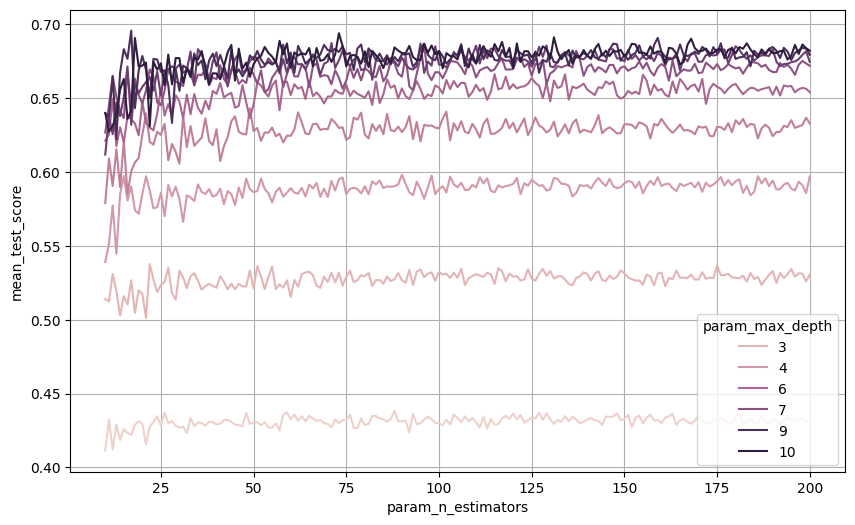

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = result
             , hue = 'param_max_depth' )
plt.grid()
plt.show()

In [ ]:
model_gs.best_estimator_.feature_importances_

array([0.0976918 , 0.04666456, 0.06125197, 0.03691964, 0.29684879,
       0.09066778, 0.01892408, 0.29385163, 0.04994127, 0.0026065 ,
       0.00463198])

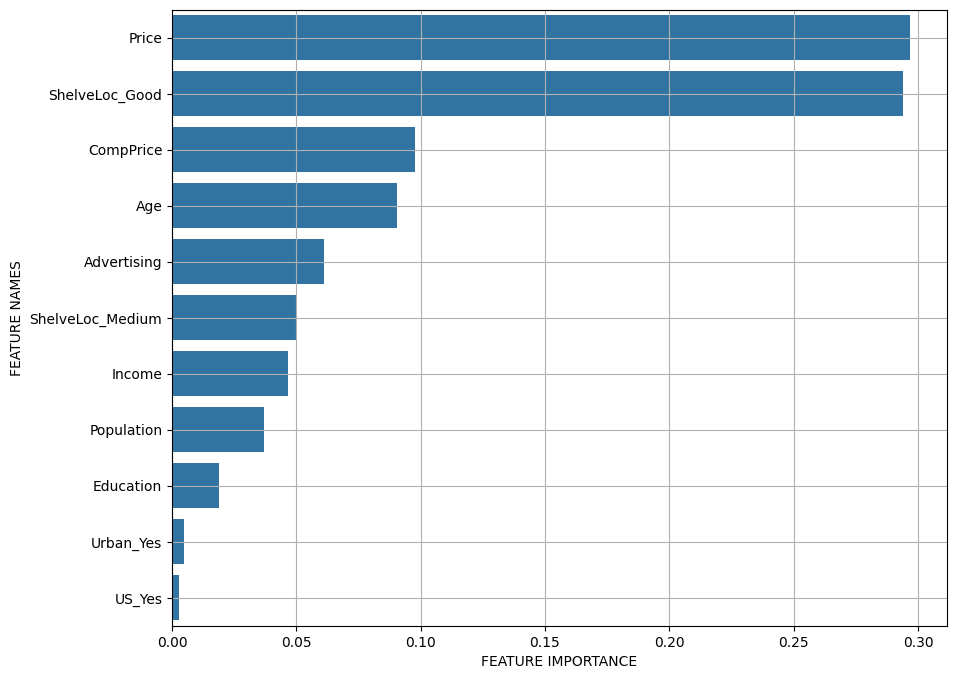

In [ ]:
plot_feature_importance(model_gs.best_estimator_.feature_importances_, x_train.columns)